## Dmitry Gromov

### Lesson8

****

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, 
при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [180]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline


Загружаем "Boston House Prices dataset"

In [181]:
boston = load_boston()

In [182]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [183]:
for line in str.split(boston.DESCR,sep='\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [184]:
X, y = load_boston(return_X_y=True)

Посмотрим на X в виде DataFrame

In [185]:
df = pd.DataFrame(X, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Смотрим, все ли данные присутсвуют 

In [186]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Разбиваем данные

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [188]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((101, 13), (405, 13), (101,), (405,))

Масштабируем X_train и смотрим на результат

In [189]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston.feature_names)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.465832,-0.555979,0.466274,-0.251312,-1.042969,0.635069,-1.238995,1.096984,-0.599435,-0.716467,-1.066360,0.440787,-0.883104
1,0.615201,-0.555979,1.097655,-0.251312,1.375414,0.046311,0.575265,-0.546855,1.724669,1.579520,0.840680,0.440787,0.321455
2,-0.451789,0.591615,-0.751172,-0.251312,-1.095543,0.243651,-2.015036,1.828864,-0.250819,-0.466771,0.341217,0.216900,-1.301267
3,-0.440941,-0.555979,-0.172658,-0.251312,0.253845,-0.591373,-0.836991,-0.726576,-0.367024,-0.095272,0.386623,0.440787,0.259042
4,0.811409,-0.555979,1.097655,-0.251312,0.867203,-0.129827,-0.039975,-0.430165,1.724669,1.579520,0.840680,0.440787,0.201311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.458894,-0.555979,-0.343342,-0.251312,-0.315702,-0.738155,0.886381,-0.813558,-0.483229,-0.137903,1.158520,0.426900,1.050119
97,-0.437696,0.487289,-0.585019,-0.251312,-0.806388,-0.705537,-0.854470,0.316645,-0.715640,-1.118417,0.114189,0.347642,0.166984
98,-0.484768,3.617091,-1.332706,-0.251312,-1.060494,0.564940,-1.287934,2.311569,-0.599435,-0.771278,-0.612303,0.373497,-0.926793
99,1.361580,-0.555979,1.097655,-0.251312,1.611995,0.555154,0.980764,-0.857533,1.724669,1.579520,0.840680,-2.800098,1.769421


Масштабируем X_test и смотрим на результат

In [190]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=boston.feature_names)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.404897,-0.476515,-1.036782,-0.277719,-0.381888,0.183227,0.536843,-0.535993,-0.532964,-0.664933,-0.874640,0.425941,-0.520187
1,-0.408776,1.175254,-0.695170,3.600766,-0.924218,0.656676,-1.293321,0.133663,-0.647656,-0.912878,-0.409955,0.441183,-1.275764
2,-0.403365,-0.476515,2.392371,-0.277719,0.470344,-0.416198,1.062300,-0.900086,-0.647656,1.785001,0.751756,0.367256,0.718082
3,-0.404913,-0.476515,-0.058265,-0.277719,-1.216904,-0.302681,-2.190531,0.699640,-0.647656,-0.611802,0.333540,0.375966,-1.002879
4,0.143658,-0.476515,0.996971,-0.277719,1.365619,0.018489,0.812082,-0.666107,1.646184,1.519345,0.798225,0.312600,0.608379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-0.402943,-0.476515,0.103856,-0.277719,0.160442,0.706513,0.722719,-0.656422,-0.991732,-0.800713,1.169973,0.403621,-0.871236
401,-0.411632,-0.476515,-0.871766,-0.277719,-0.338846,-0.538021,-0.338919,0.852960,-0.532964,-1.089982,0.798225,0.418428,-0.311752
402,-0.357838,-0.476515,-0.725568,3.600766,-0.407714,0.480863,0.265178,0.166601,-0.188888,-0.599995,-0.502892,0.349183,-0.451623
403,-0.387315,-0.476515,-0.090110,-0.277719,-0.562665,-0.693069,0.129345,0.263402,-0.647656,-0.777099,0.054730,0.359853,0.716711


Строим модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [191]:
# tsnem = TSNE?
tsnem = TSNE(n_components=2, learning_rate=250, random_state=42)
tsnem

TSNE(learning_rate=250, random_state=42)

In [192]:
X_train_tsne = tsnem.fit_transform(X_train_scaled)
X_train_tsne.shape

(101, 2)

In [193]:
X_train_tsne

array([[ 6.5355225e+00,  9.0902179e-01],
       [-2.3908627e+00, -3.9067168e+00],
       [ 7.8266945e+00,  1.9681014e+00],
       [ 2.6057038e+00, -5.9325833e-02],
       [-2.1925380e+00, -4.2304268e+00],
       [ 7.6067152e+00,  3.2913387e+00],
       [ 8.7545824e+00,  2.3448904e+00],
       [ 4.2963939e+00,  3.7078841e+00],
       [ 9.0916309e+00,  4.1521077e+00],
       [ 6.6957217e-01,  1.0706259e+00],
       [ 6.2949362e+00,  1.3976077e+00],
       [ 1.8591926e+00,  4.2017009e-02],
       [-3.2126074e+00, -4.4403353e+00],
       [ 8.0299454e+00,  3.6379035e+00],
       [ 3.0122702e+00, -6.5756810e-01],
       [ 4.9060578e+00, -2.3955932e+00],
       [ 2.0097315e+00, -1.9394109e+00],
       [ 6.7016163e+00,  2.2265992e+00],
       [-3.0866563e+00, -4.4540696e+00],
       [ 4.3998122e+00, -3.9992595e-01],
       [-3.0066726e+00, -3.5806928e+00],
       [-7.8307891e-01, -2.5947421e+00],
       [ 4.2604947e+00,  1.5431976e+00],
       [-4.6484528e+00, -3.0017123e+00],
       [ 7.45574

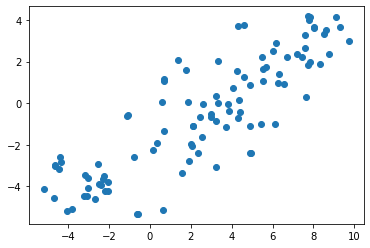

In [194]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

****

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [195]:
from sklearn.cluster import KMeans

In [196]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

С помощью метода fit_predict обучим модель и сразу предскажем к какому кластеру относится каждый объект тренировочного набора

In [197]:
labels = kmeans.fit_predict(X_train_scaled)

In [198]:
labels.shape, labels

((101,),
 array([1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2,
        0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0,
        1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
        1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0], dtype=int32))

Строим диаграмму рассеяния

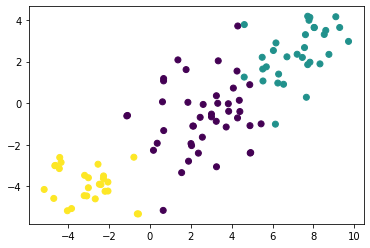

In [199]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels)

Получаем средние значения по кластерам для price

In [200]:
# np.ma.masked_array?

In [201]:
mask_zero = [False if x == 0 else True for x in labels]
mask_one = [False if x == 1 else True for x in labels]
mask_two = [False if x == 2 else True for x in labels]

print("Средние значения \'price\' по кластерам:")
print(np.ma.masked_array(y_train, mask=mask_zero).mean())
print(np.ma.masked_array(y_train, mask=mask_one).mean())
print(np.ma.masked_array(y_train, mask=mask_two).mean())

Средние значения 'price' по кластерам:
23.476744186046513
26.212500000000002
16.869230769230764


Получаем средние значения по кластерам для CRIM

In [202]:
print(np.ma.masked_array(X_train[:,0], mask=mask_zero).mean())
print(np.ma.masked_array(X_train[:,0], mask=mask_one).mean())
print(np.ma.masked_array(X_train[:,0], mask=mask_two).mean())

0.5716976744186046
0.094388125
10.364110384615383


****

### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Создаём скалер и нормализуем тестовый набор

In [203]:
scaler = StandardScaler()

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=boston.feature_names)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.404897,-0.476515,-1.036782,-0.277719,-0.381888,0.183227,0.536843,-0.535993,-0.532964,-0.664933,-0.874640,0.425941,-0.520187
1,-0.408776,1.175254,-0.695170,3.600766,-0.924218,0.656676,-1.293321,0.133663,-0.647656,-0.912878,-0.409955,0.441183,-1.275764
2,-0.403365,-0.476515,2.392371,-0.277719,0.470344,-0.416198,1.062300,-0.900086,-0.647656,1.785001,0.751756,0.367256,0.718082
3,-0.404913,-0.476515,-0.058265,-0.277719,-1.216904,-0.302681,-2.190531,0.699640,-0.647656,-0.611802,0.333540,0.375966,-1.002879
4,0.143658,-0.476515,0.996971,-0.277719,1.365619,0.018489,0.812082,-0.666107,1.646184,1.519345,0.798225,0.312600,0.608379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-0.402943,-0.476515,0.103856,-0.277719,0.160442,0.706513,0.722719,-0.656422,-0.991732,-0.800713,1.169973,0.403621,-0.871236
401,-0.411632,-0.476515,-0.871766,-0.277719,-0.338846,-0.538021,-0.338919,0.852960,-0.532964,-1.089982,0.798225,0.418428,-0.311752
402,-0.357838,-0.476515,-0.725568,3.600766,-0.407714,0.480863,0.265178,0.166601,-0.188888,-0.599995,-0.502892,0.349183,-0.451623
403,-0.387315,-0.476515,-0.090110,-0.277719,-0.562665,-0.693069,0.129345,0.263402,-0.647656,-0.777099,0.054730,0.359853,0.716711


Получаем данные о принадлежности к кластерам по тестовому набору

In [204]:
labels = kmeans.predict(X_test_scaled)

Получаем средние значения по кластерам для price

In [205]:
mask_zero = [False if x == 0 else True for x in labels]
mask_one = [False if x == 1 else True for x in labels]
mask_two = [False if x == 2 else True for x in labels]

print(np.ma.masked_array(y_test, mask=mask_zero).mean())
print(np.ma.masked_array(y_test, mask=mask_one).mean())
print(np.ma.masked_array(y_test, mask=mask_two).mean())

22.96184971098266
27.927731092436975
16.09646017699115


Получаем средние значения по кластерам для CRIM

In [206]:
print(np.ma.masked_array(X_test[:, 0], mask=mask_zero).mean())
print(np.ma.masked_array(X_test[:, 0], mask=mask_one).mean())
print(np.ma.masked_array(X_test[:, 0], mask=mask_two).mean())

0.5866383236994219
0.087041512605042
12.562179292035399
